In [1]:
from skimage import io
from skimage.transform import resize
import numpy as np
import cv2

class ImageUtils(object): 
    @staticmethod  
    def preprocessImage(imgPath:str, size:tuple) -> np.ndarray:
        """Read the image and resize it."""
        img = io.imread(imgPath)
        img = cv2.resize(img, size)
        return img

In [2]:
from sklearn.cluster import KMeans

class ImageCompressionKmeans(object):

    @staticmethod
    def encoder(imgPath:str, size:tuple = (256, 256)):
        """Encoder a image using kmeans algorith."""
        img = ImageUtils.preprocessImage(imgPath=imgPath, size=size)
        #get image dimension
        rows = img.shape[0]
        cols = img.shape[1]
        #reshape the image
        img = img.reshape(img.shape[0] * img.shape[1], -1)
        #kmeans instance
        kmeans = KMeans(n_clusters=128, n_init=10, max_iter=200)
        #fitting with the image
        kmeans.fit(img)

        #getting the custers and labels
        clusters = np.asarray(kmeans.cluster_centers_, dtype=np.uint8)
        labels = np.asarray(kmeans.labels_, dtype=np.uint8)
        labels = labels.reshape(rows, cols)

        return clusters, labels

    @staticmethod
    def decoder(clusters:np.ndarray, labels:np.ndarray):
        """Reconstruct the image previusly encoder with kmeans algorith. For this, clusters and              labels are needed to reconstruct. """
        
        #image shape with zeros matrix
        image = np.zeros((labels.shape[0], labels.shape[1], 3), dtype=np.uint8)
        
        #loop to construct the image
        for i in range(labels.shape[0]): 
            for j in range(labels.shape[1]):
                image[i, j, :] = clusters[labels[i, j], :]

        return image

In [3]:
#encoder a input image and saves the outputs in npy format
clusters, labels = ImageCompressionKmeans.encoder('./teste.jpg')
np.save('clusters.npy', clusters)
np.save('labels.npy', labels)

In [4]:
#decoder a saved output image from kmeans compression and reconstruct it
c = np.load('clusters.npy')
l = np.load('labels.npy')
imgReconstruct = ImageCompressionKmeans.decoder(clusters=c, labels=l)

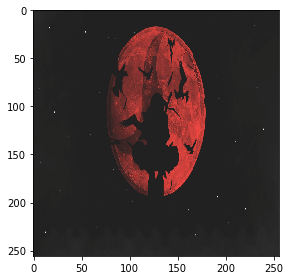

In [5]:
io.imshow(imgReconstruct)

In [6]:
import os

print("files size compressed = {} bytes".format(os.path.getsize('./clusters.npy') + os.path.getsize('./labels.npy')))

print("original image file = {} bytes".format(os.path.getsize('./teste.jpg')))

files size compressed = 66176 bytes
original image file = 158593 bytes
